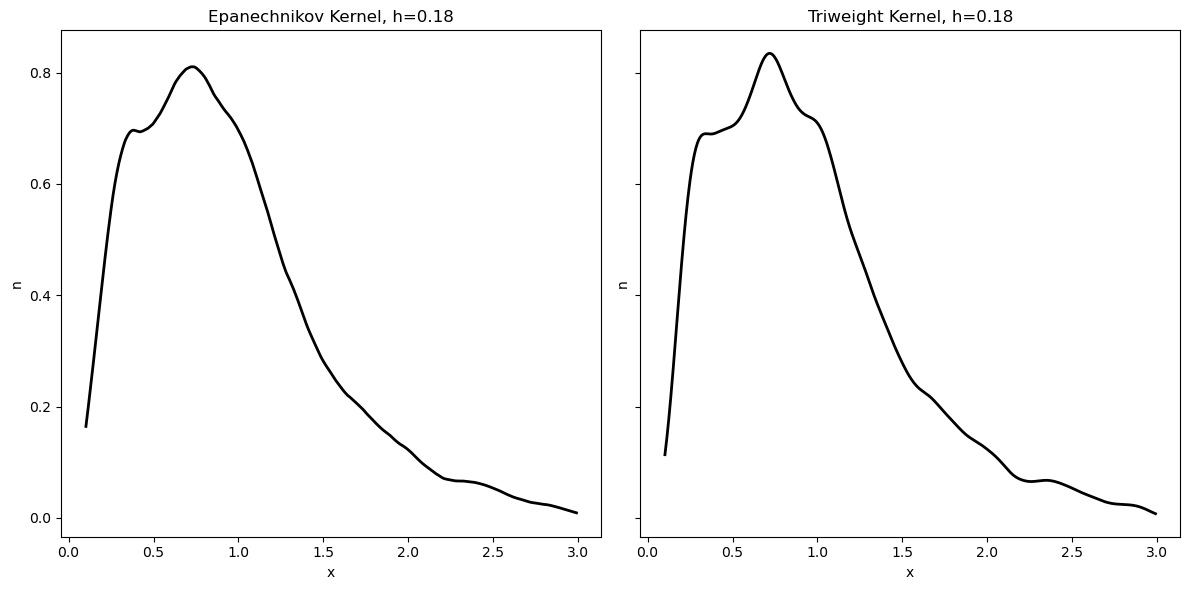

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

def triweight_kernel(x):
    """Triweight kernel function"""
    return (35 / 32) * (1 - x**2)**3 * (np.abs(x) <= 1)

def kernel_density_estimation(x, data, bandwidth, kernel_function):
    """Manual kernel density estimation"""
    n = data.shape[0]
    densities = np.zeros(x.shape[0])
    for i, xi in enumerate(x):
        u = (xi - data) / bandwidth
        densities[i] = np.sum(kernel_function(u))
    return densities / (n * bandwidth)

# Read the data file
file_path = 'agg73sh.dat'
data = pd.read_csv(file_path, sep='\s+', header=None)

# Extract the net-income data
net_income = data[0].values

# Define bandwidth
bandwidth = 0.18

# Define range for x values
x_values = np.linspace(net_income.min(), net_income.max(), 1000).reshape(-1, 1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Epanechnikov Kernel Density Estimate
kde_epanechnikov = KernelDensity(kernel='epanechnikov', bandwidth=bandwidth).fit(net_income.reshape(-1, 1))
log_dens_epanechnikov = kde_epanechnikov.score_samples(x_values)
density_epanechnikov = np.exp(log_dens_epanechnikov)
axes[0].plot(x_values, density_epanechnikov, color='black', linewidth=2)
axes[0].set_title(f'Epanechnikov Kernel, h={bandwidth}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('n')

# Triweight Kernel Density Estimate
density_triweight = kernel_density_estimation(x_values, net_income, bandwidth, triweight_kernel)
axes[1].plot(x_values, density_triweight, color='black', linewidth=2)
axes[1].set_title(f'Triweight Kernel, h={bandwidth}')
axes[1].set_xlabel('x')
axes[1].set_ylabel('n')

# Set transparent background
fig.patch.set_alpha(0.0)
for ax in axes:
    ax.patch.set_alpha(0.0)

fig.patch.set_alpha(0)
plt.tight_layout()
plt.show()
